In [1]:
# Задание №1

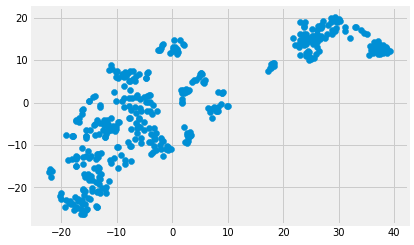

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config inlinebackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

boston = load_boston()
data = boston.data
target = boston.target

X = pd.DataFrame(data, columns=boston.feature_names)
y = pd.DataFrame(target, columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [3]:
# Задание №2

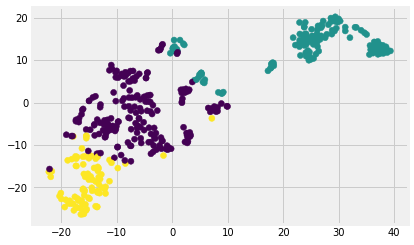

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [5]:
y_train[labels_train==0].mean()

price    24.958115
dtype: float64

In [6]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [7]:
y_train[labels_train==2].mean()

price    27.788372
dtype: float64

In [8]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.42166020942408367

In [9]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [10]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.07356558139534886

In [11]:
# Задание №3

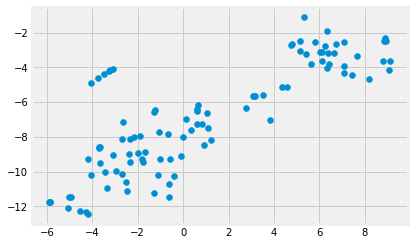

In [12]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

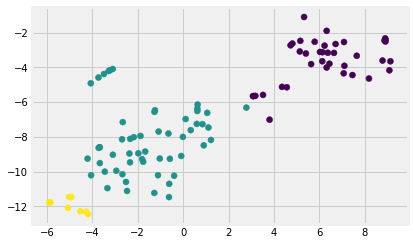

In [13]:
labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

In [14]:
y_test[labels_test==0].mean()

price    16.710526
dtype: float64

In [15]:
y_test[labels_test==1].mean()

price    22.690909
dtype: float64

In [16]:
y_test[labels_test==2].mean()

price    34.311111
dtype: float64

In [17]:
X_test.loc[labels_test==0, 'CRIM'].mean()

9.419181842105264

In [18]:
X_test.loc[labels_test==1, 'CRIM'].mean()

0.21929690909090907

In [19]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.04070333333333334